# Introduction

### In this case study I will be working for a fintech company that provides a subscription product to its users, which allows them to manage their bank accounts (saving accounts, credits cards etc.), provides them with personalized coupons, informs them of the latest low-APR loans available in the market and educates them on the best available methods to save money (like videos on saving money on taxes, free courses on financial health etc.).

### I am in charge of identifying users who are likely to cancel their subscription so that the company can start building new features that the users may be interested in. These features can increase the engagement and interest of the users towards the product.


# Importing Essential Libraries & Our Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
dataset = pd.read_csv('churn_data.csv')

In [3]:
dataset.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [4]:
dataset.describe()

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,...,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,...,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


In [5]:
dataset.isnull().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

In [6]:
dataset.shape

(27000, 31)

### Since the number of null columns in 'credit_score' and 'rewards_earned' is high, we will not use these columns for our model. Also only 4 rows are null in 'age' column so we can simply remove those rows and keep the age column for the model.

In [7]:
dataset = dataset[pd.notnull(dataset['age'])]

In [8]:
dataset = dataset.drop(columns = ['credit_score', 'rewards_earned'])

In [9]:
dataset.isnull().sum()

user                       0
churn                      0
age                        0
housing                    0
deposits                   0
withdrawal                 0
purchases_partners         0
purchases                  0
cc_taken                   0
cc_recommended             0
cc_disliked                0
cc_liked                   0
cc_application_begin       0
app_downloaded             0
web_user                   0
app_web_user               0
ios_user                   0
android_user               0
registered_phones          0
payment_type               0
waiting_4_loan             0
cancelled_loan             0
received_loan              0
rejected_loan              0
zodiac_sign                0
left_for_two_month_plus    0
left_for_one_month         0
reward_rate                0
is_referred                0
dtype: int64

In [10]:
dataset.head()

,user,churn,age,housing,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
0,55409,0,37.0,na,0,0,0,0,0,0,...,Bi-Weekly,0,0,0,0,Leo,1,0,0.00,0
1,23547,0,28.0,R,0,0,1,0,0,96,...,Weekly,0,0,0,0,Leo,0,0,1.47,1
2,58313,0,35.0,R,47,2,86,47,0,285,...,Semi-Monthly,0,0,0,0,Capricorn,1,0,2.17,0
3,8095,0,26.0,R,26,3,38,25,0,74,...,Bi-Weekly,0,0,0,0,Capricorn,0,0,1.10,1
4,61353,1,27.0,na,0,0,2,0,0,0,...,Bi-Weekly,0,0,0,0,Aries,1,0,0.03,0


# Visualization & Exploratory Data Analysis

In [11]:
dataset.shape

(26996, 29)

In [12]:
dataset2 = dataset.drop(columns = ['user', 'churn'])

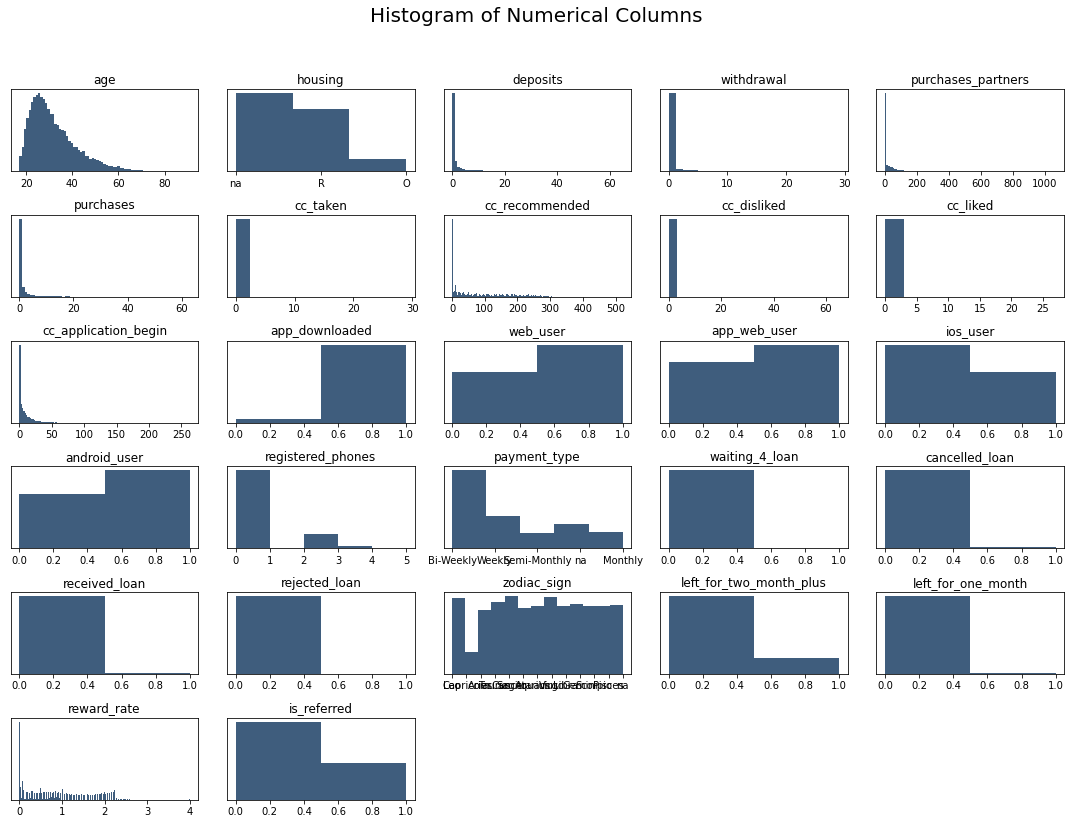

In [13]:
fig = plt.figure(figsize = (15, 12))
plt.suptitle('Histogram of Numerical Columns', fontsize = 20)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(6, 5, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])
    vals = np.size(dataset2.iloc[:, i - 1].unique())
    plt.hist(dataset2.iloc[:, i - 1], bins = vals, color = '#3F5D7D')
plt.tight_layout(rect = [0, 0.03, 1, 0.95])
#plt.savefig('1. Histogram of Numerical Columns.png')

In [14]:
dataset2 = dataset[['housing', 'is_referred', 'app_downloaded', 'web_user', 'app_web_user', 'ios_user', 'android_user', 
                    'registered_phones', 'payment_type', 'waiting_4_loan', 'cancelled_loan', 'received_loan', 'rejected_loan', 
                    'zodiac_sign', 'left_for_two_month_plus', 'left_for_one_month']]

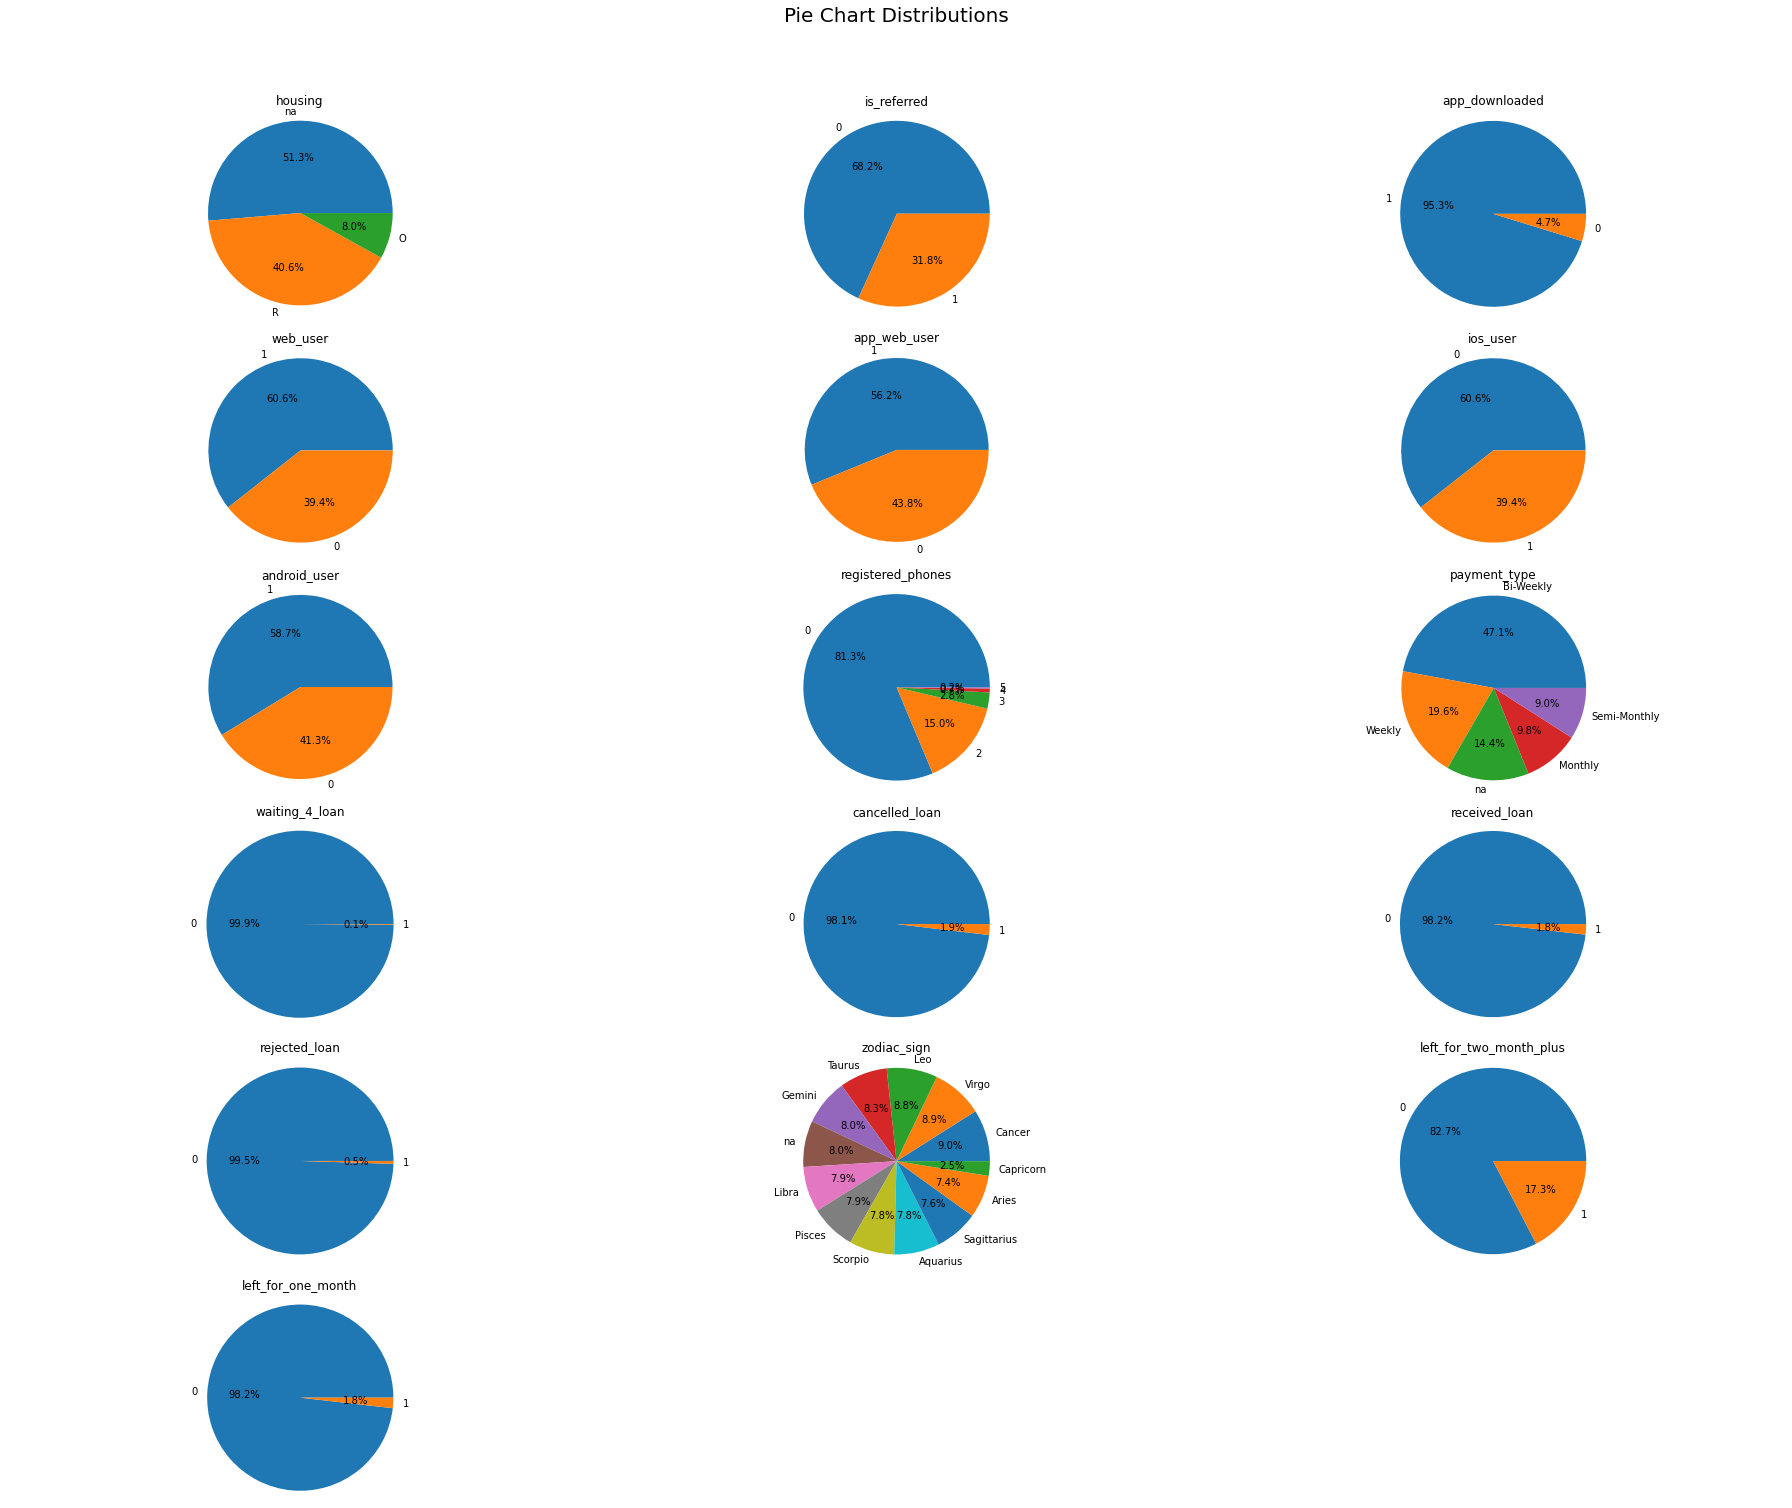

In [15]:
fig = plt.figure(figsize = (25, 22))
plt.suptitle('Pie Chart Distributions', fontsize = 20)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(6, 3, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])
    
    values = dataset2.iloc[:, i - 1].value_counts().values
    index = dataset2.iloc[:, i - 1].value_counts().index
    
    plt.pie(values, labels = index, autopct = '%1.1f%%')
    plt.axis('equal')
plt.tight_layout(rect = [0, 0.03, 1, 0.95])
#plt.savefig('2. Pie Chart Distributions.png')

In [16]:
dataset[dataset2.waiting_4_loan == 1].churn.value_counts()

0    27
1     8
Name: churn, dtype: int64

In [17]:
dataset[dataset2.cancelled_loan == 1].churn.value_counts()

1    274
0    234
Name: churn, dtype: int64

In [18]:
dataset[dataset2.rejected_loan == 1].churn.value_counts()

1    107
0     25
Name: churn, dtype: int64

In [19]:
dataset[dataset2.received_loan == 1].churn.value_counts()

1    292
0    199
Name: churn, dtype: int64

In [20]:
dataset[dataset2.left_for_one_month == 1].churn.value_counts()

1    266
0    222
Name: churn, dtype: int64

<AxesSubplot:title={'center':'Correlation with the Dependant Variable'}>

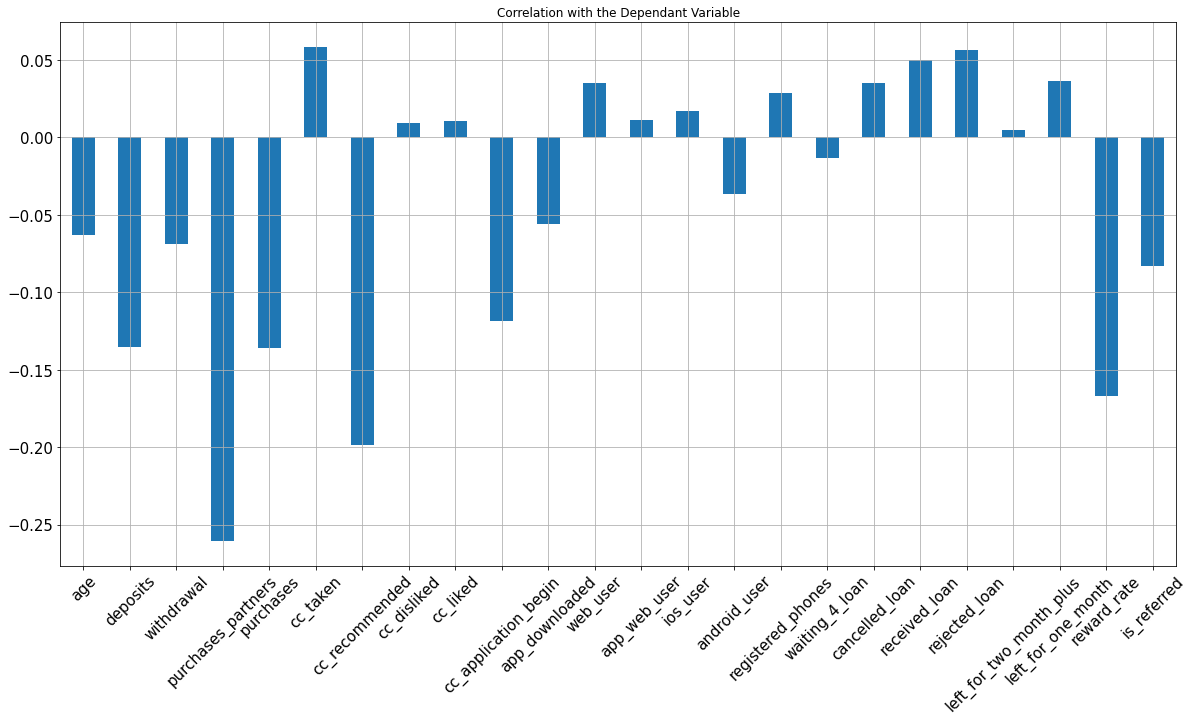

In [21]:
dataset.drop(columns = ['churn', 'user', 'housing', 'payment_type', 'zodiac_sign']).corrwith(dataset.churn).plot.bar(
figsize = (20, 10), title = 'Correlation with the Dependant Variable', fontsize = 15, rot = 45, grid = True)
#plt.savefig('3. Correlation of Independent Variable (churn) with all the dependant variables.png')

<AxesSubplot:>

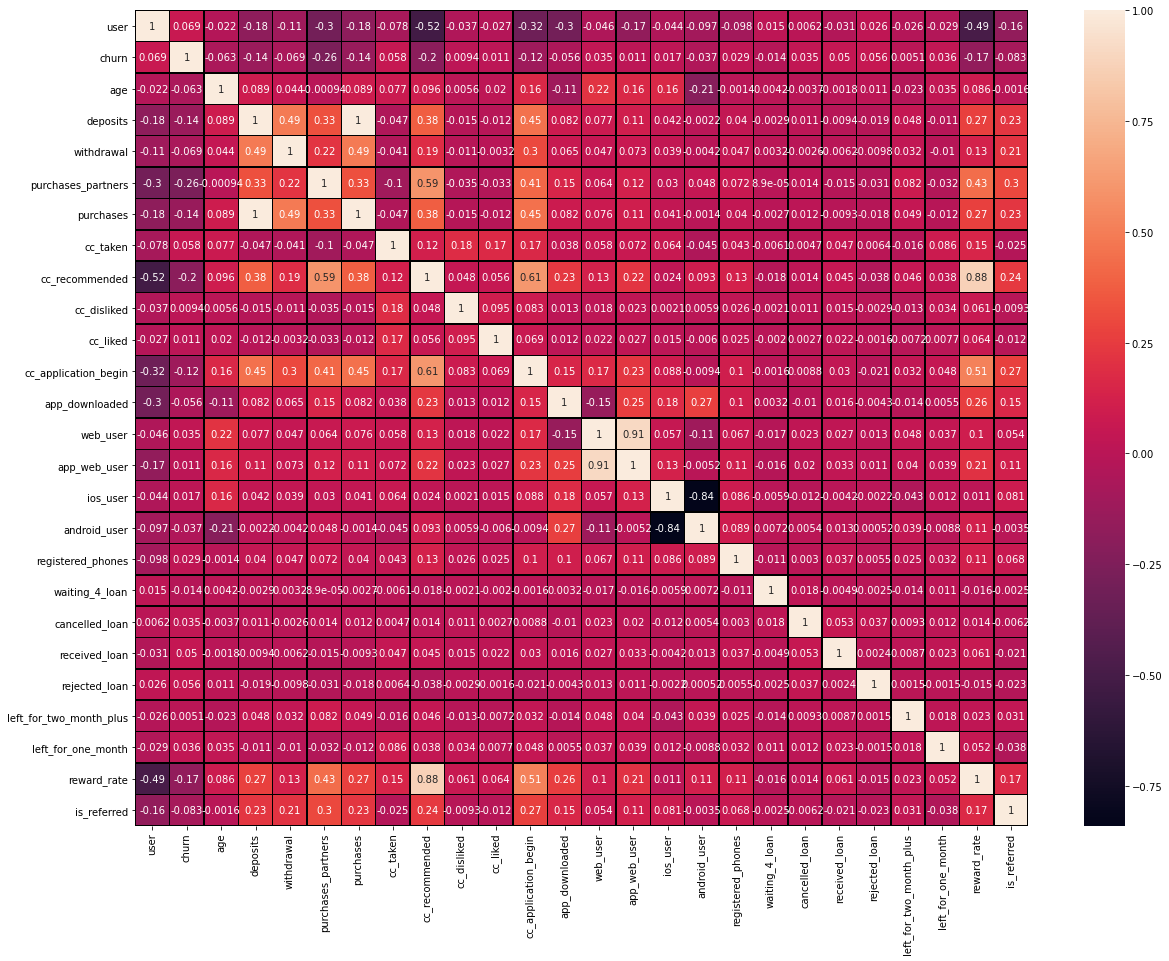

In [22]:
plt.figure(figsize = (20, 15))
sns.heatmap(dataset.corr(), annot = True, linewidths = 0.5, linecolor = 'black')
#plt.savefig('4. Heatmap showing Correlation of all vriables with each other.png')

In [23]:
dataset = dataset.drop(columns = ['app_web_user'])

In [24]:
dataset.to_csv('new_churn_data.csv', index = False)

# Data Preparation

In [25]:
dataset = pd.read_csv('new_churn_data.csv')

In [26]:
user_identifier = dataset['user']
dataset = dataset.drop(columns = ['user'])

In [27]:
dataset['housing'].value_counts()

na    13856
R     10969
O      2171
Name: housing, dtype: int64

In [28]:
dataset = pd.get_dummies(dataset)
dataset.columns

Index(['churn', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'ios_user',
       'android_user', 'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred', 'housing_O',
       'housing_R', 'housing_na', 'payment_type_Bi-Weekly',
       'payment_type_Monthly', 'payment_type_Semi-Monthly',
       'payment_type_Weekly', 'payment_type_na', 'zodiac_sign_Aquarius',
       'zodiac_sign_Aries', 'zodiac_sign_Cancer', 'zodiac_sign_Capricorn',
       'zodiac_sign_Gemini', 'zodiac_sign_Leo', 'zodiac_sign_Libra',
       'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius', 'zodiac_sign_Scorpio',
       'zodiac_sign_Taurus', 'zodiac_sign_Virgo', 'zodiac_sign_na'],
      dtype='object')

In [29]:
dataset = dataset.drop(columns = ['housing_na', 'zodiac_sign_na', 'payment_type_na'])

# Splitting the dataset into the Training Set and Test Set

In [30]:
X = dataset.drop(columns = 'churn')
y = dataset['churn']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Balancing the Training Set

In [32]:
y_train.value_counts()

0    12656
1     8940
Name: churn, dtype: int64

In [33]:
pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    higher = neg_index
    lower = pos_index

In [34]:
random.seed(0)
higher = np.random.choice(higher, size = len(lower))
lower = np.asarray(lower)
new_indexes = np.concatenate((lower, higher))

X_train = X_train.loc[new_indexes, ]
y_train = y_train[new_indexes]

# Feature Scaling

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train2 = pd.DataFrame(sc.fit_transform(X_train))
X_test2 = pd.DataFrame(sc.transform(X_test))

X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values

X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

X_train = X_train2
X_test = X_test2

In [36]:
X_train

,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,...,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
11695,-0.619972,-0.354877,-0.281152,-0.582693,-0.354215,-0.170599,-0.910593,-0.067651,-0.068348,-0.566514,...,-0.309933,-0.15976,-0.292705,-0.309282,-0.298965,-0.290333,-0.288518,-0.298521,-0.298632,-0.315429
19766,-0.418955,-0.354877,-0.281152,-0.630294,-0.354215,-0.170599,0.317446,1.358758,-0.068348,-0.566514,...,-0.309933,-0.15976,-0.292705,-0.309282,3.344868,-0.290333,-0.288518,-0.298521,-0.298632,-0.315429
8354,0.284606,-0.354877,-0.281152,-0.630294,-0.354215,-0.170599,2.000313,-0.067651,-0.068348,-0.245556,...,-0.309933,-0.15976,-0.292705,-0.309282,-0.298965,-0.290333,-0.288518,-0.298521,-0.298632,3.170281
17883,0.586132,-0.354877,-0.281152,0.036120,-0.354215,-0.170599,-0.182866,-0.067651,-0.068348,-0.004838,...,-0.309933,-0.15976,-0.292705,-0.309282,-0.298965,-0.290333,-0.288518,-0.298521,3.348599,-0.315429
25149,-0.820989,-0.243187,-0.281152,-0.106683,-0.240408,-0.170599,-0.580842,-0.067651,-0.068348,-0.245556,...,-0.309933,-0.15976,-0.292705,-0.309282,-0.298965,3.444316,-0.288518,-0.298521,-0.298632,-0.315429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7313,-1.022006,-0.354877,-0.281152,-0.630294,-0.354215,-0.170599,-0.956076,-0.067651,-0.068348,-0.646754,...,-0.309933,-0.15976,-0.292705,-0.309282,-0.298965,-0.290333,-0.288518,3.349845,-0.298632,-0.315429
25250,0.385114,0.091882,-0.281152,-0.439890,0.101013,-0.170599,1.420406,-0.067651,-0.068348,0.797557,...,3.226506,-0.15976,-0.292705,-0.309282,-0.298965,-0.290333,-0.288518,-0.298521,-0.298632,-0.315429
1323,0.787149,-0.354877,-0.281152,-0.630294,-0.354215,-0.170599,-0.501247,-0.067651,-0.068348,-0.646754,...,-0.309933,-0.15976,-0.292705,-0.309282,-0.298965,-0.290333,-0.288518,-0.298521,3.348599,-0.315429
14218,-0.418955,-0.243187,-0.281152,1.511751,-0.240408,-0.170599,0.920094,-0.067651,-0.068348,-0.325796,...,3.226506,-0.15976,-0.292705,-0.309282,-0.298965,-0.290333,-0.288518,-0.298521,-0.298632,-0.315429


### Fitting Model to the Training Set

In [37]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

### Predicting the Test Set

In [38]:
y_pred = classifier.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report

Test Data Accuracy: 0.6113


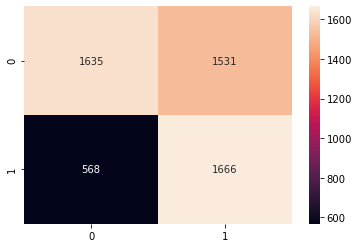

In [40]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = 'g')
print('Test Data Accuracy: %0.4f' %accuracy_score(y_test, y_pred))
#plt.savefig('5. Confusion Matrix Before Feature Engineering.png')

In [41]:
precision_score(y_test, y_pred)

0.5211135439474507

In [42]:
f1_score(y_test, y_pred)

0.6135150064444853

In [43]:
recall_score(y_test, y_pred)

0.7457475380483438

In [44]:
print((classification_report(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.74      0.52      0.61      3166
           1       0.52      0.75      0.61      2234

    accuracy                           0.61      5400
   macro avg       0.63      0.63      0.61      5400
weighted avg       0.65      0.61      0.61      5400



### K-Fold Cross Validation

In [45]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

In [46]:
accuracies

array([0.64205817, 0.66498881, 0.651566  , 0.63199105, 0.64149888,
       0.64541387, 0.64765101, 0.65604027, 0.62975391, 0.65100671])

In [47]:
accuracies.mean()

0.6461968680089486

In [48]:
accuracies.std()

0.010080155609311709

### Analyzing Coefficients

In [49]:
pd.concat([pd.DataFrame(X_train.columns, columns = ['features']), pd.DataFrame(np.transpose(classifier.coef_), 
                                                                               columns = ['coef'])], axis = 1)

,features,coef
0,age,-0.166823
1,deposits,0.146401
2,withdrawal,0.054753
3,purchases_partners,-0.753717
4,purchases,-0.275242
5,cc_taken,0.064549
6,cc_recommended,0.041492
7,cc_disliked,0.006630
8,cc_liked,0.000965
9,cc_application_begin,0.020635


# Feature Selection

In [50]:
X_train.shape

(17880, 41)

In [51]:
from sklearn.feature_selection import RFE

In [52]:
classifier = LogisticRegression()
rfe = RFE(classifier, 20)
rfe = rfe.fit(X_train, y_train)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [53]:
print(rfe.support_)

[ True  True  True  True  True  True  True False False False False  True
  True False  True False  True  True  True False False  True False False
  True False False False  True  True False False False  True False  True
 False False  True False False]


In [54]:
X_train.columns[rfe.support_]

Index(['age', 'deposits', 'withdrawal', 'purchases_partners', 'purchases',
       'cc_taken', 'cc_recommended', 'web_user', 'ios_user',
       'registered_phones', 'cancelled_loan', 'received_loan', 'rejected_loan',
       'reward_rate', 'housing_R', 'payment_type_Weekly',
       'zodiac_sign_Aquarius', 'zodiac_sign_Gemini', 'zodiac_sign_Libra',
       'zodiac_sign_Scorpio'],
      dtype='object')

In [55]:
rfe.ranking_

array([ 1,  1,  1,  1,  1,  1,  1, 20, 22, 16, 15,  1,  1, 14,  1,  4,  1,
        1,  1,  6,  2,  1,  3,  7,  1,  8, 19, 18,  1,  1, 10, 13, 17,  1,
        9,  1, 21, 12,  1,  5, 11])

--------

In [56]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train[X_train.columns[rfe.support_]], y_train)

LogisticRegression(random_state=0)

### Predicting the Test Set on Feature Engineering

In [57]:
y_pred = classifier.predict(X_test[X_test.columns[rfe.support_]])

Test Data Accuracy: 0.6091


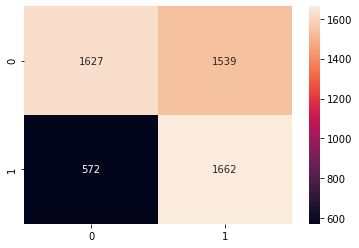

In [58]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = 'g')
print('Test Data Accuracy: %0.4f' %accuracy_score(y_test, y_pred))
#plt.savefig('6. Confusion Matrix Ater Feature Engineering.png')

In [59]:
precision_score(y_test, y_pred)

0.5192127460168697

In [60]:
f1_score(y_test, y_pred)

0.6115915363385465

In [61]:
recall_score(y_test, y_pred)

0.7439570277529096

In [62]:
print((classification_report(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.74      0.51      0.61      3166
           1       0.52      0.74      0.61      2234

    accuracy                           0.61      5400
   macro avg       0.63      0.63      0.61      5400
weighted avg       0.65      0.61      0.61      5400



# NOTE that our accuracy has slightly decreased but the purpose of doing this was to find the 20 best features.
# This showed us the features which were not helping in predicting if a customer would churn or not.
# This is useful in putting the model into production because with only so less features, our model is faster and will consume much less time and resources.

--------

### Analyzing The Coefficients

In [63]:
pd.concat([pd.DataFrame(X_train.columns[rfe.support_], columns = ['features']), pd.DataFrame(np.transpose(classifier.coef_), 
                                                                               columns = ['coef'])], axis = 1)

,features,coef
0,age,-0.163279
1,deposits,0.168174
2,withdrawal,0.060534
3,purchases_partners,-0.741646
4,purchases,-0.290678
5,cc_taken,0.068732
6,cc_recommended,0.053228
7,web_user,0.146408
8,ios_user,0.079578
9,registered_phones,0.096093


# FINAL RESULTS

In [64]:
final_results = pd.concat([y_test, user_identifier], axis = 1).dropna()
final_results['churn_prediction'] = y_pred
final_results = final_results[['user', 'churn', 'churn_prediction']].reset_index(drop = True)

In [65]:
final_results

,user,churn,churn_prediction
0,61353,1.0,1
1,67679,0.0,0
2,21269,0.0,0
3,69531,0.0,1
4,25997,0.0,0
...,...,...,...
5395,22377,0.0,1
5396,24291,1.0,1
5397,23740,0.0,1
5398,47663,1.0,0
